<a href="https://colab.research.google.com/github/Sphinx500/Train-and-evaluate-regression-models/blob/main/Experimentar%20con%20modelos%20de%20regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: experimente con modelos de regresión más potentes

Este módulo requiere una caja de arena para completarse. Una caja de arena le da acceso a recursos gratuitos. No se cobrará su suscripción personal. La zona de pruebas solo se puede utilizar para completar la formación en Microsoft Learn. El uso por cualquier otro motivo está prohibido y puede resultar en la pérdida permanente del acceso a la caja de arena.

# Regresión: experimentar con modelos adicionales
En el cuaderno anterior, usamos modelos de regresión simple para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno, experimentaremos con modelos más complejos para mejorar nuestro rendimiento de regresión.

Comencemos cargando los datos de uso compartido de bicicletas como un Pandas DataFrame y viendo las primeras filas. También dividiremos nuestros datos en conjuntos de datos de prueba y entrenamiento.

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


--2021-10-11 22:45:26--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.007s  

2021-10-11 22:45:26 (6.83 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]

   instant    dteday  season  yr  ...       hum  windspeed  rentals  day
0        1  1/1/2011       1   0  ...  0.805833   0.160446      331    1
1        2  1/2/2011       1   0  ...  0.696087   0.248539      131    2
2        3  1/3/2011       1   0  ...  0.437273   0.248309      120    3
3        4  1/4/2011       1   0  ...  0.590435   0.16

Ahora tenemos los siguientes cuatro conjuntos de datos:

* X_train: los valores de características que usaremos para entrenar el modelo
* y_train: Las etiquetas correspondientes que usaremos para entrenar el modelo.
* X_test: los valores de características que usaremos para validar el modelo
* y_test: las etiquetas correspondientes que usaremos para validar el modelo

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento.

#Experimentar con algoritmos
El algoritmo de regresión lineal que usamos la última vez para entrenar el modelo tiene cierta capacidad predictiva, pero hay muchos tipos de algoritmos de regresión que podríamos probar, incluidos:

* Algoritmos lineales: no solo el algoritmo de regresión lineal que usamos anteriormente (que técnicamente es un algoritmo de mínimos cuadrados ordinarios), sino otras variantes como Lasso y Ridge.
* Algoritmos basados ​​en árboles: algoritmos que construyen un árbol de decisiones para llegar a una predicción.
* Algoritmos de conjunto: algoritmos que combinan las salidas de múltiples algoritmos de base para mejorar la generalización.

**Pruebe otro algoritmo lineal**

Intentemos entrenar nuestro modelo de regresión usando un algoritmo Lasso. Podemos hacer esto simplemente cambiando el estimador en el código de entrenamiento.

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


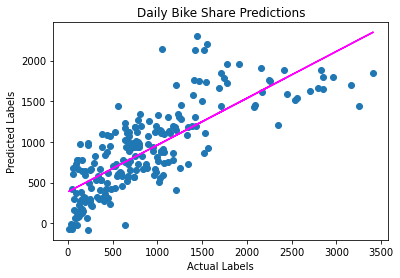

In [2]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Pruebe un algoritmo de árbol de decisión**

Como alternativa a un modelo lineal, existe una categoría de algoritmos para el aprendizaje automático que utiliza un enfoque basado en árboles en el que las características del conjunto de datos se examinan en una serie de evaluaciones, cada una de las cuales da como resultado una rama en un árbol de decisiones. en el valor de la característica. Al final de cada serie de ramas hay nodos hoja con el valor de etiqueta predicho en función de los valores de las características.

Es más fácil ver cómo funciona esto con un ejemplo. Entrenemos un modelo de regresión de árbol de decisión utilizando los datos de alquiler de bicicletas. Después de entrenar el modelo, el código siguiente imprimirá la definición del modelo y una representación de texto del árbol que utiliza para predecir los valores de la etiqueta.

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |--- feature_8 <= 0.36
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_8 >  0.36
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_

Entonces ahora tenemos un modelo basado en árboles; pero ¿es bueno? Evaluémoslo con los datos de la prueba.

MSE: 234745.74545454545
RMSE: 484.505671230529
R2: 0.5397956995344497


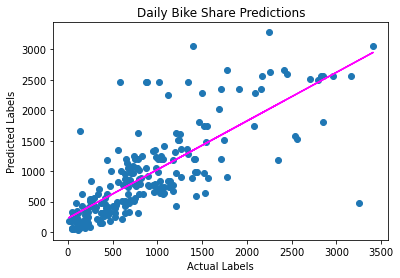

In [4]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, entonces, ¿qué más podríamos probar?

**Pruebe un algoritmo de conjunto**

Los algoritmos de conjunto funcionan combinando varios estimadores de base para producir un modelo óptimo, ya sea aplicando una función agregada a una colección de modelos base (a veces denominada embolsado) o construyendo una secuencia de modelos que se construyen entre sí para mejorar el rendimiento predictivo ( denominado refuerzo).

Por ejemplo, probemos un modelo de bosque aleatorio, que aplica una función de promedio a varios modelos de árbol de decisión para un mejor modelo general.

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

MSE: 113381.00970636362
RMSE: 336.7209671320805
R2: 0.7777236466758529


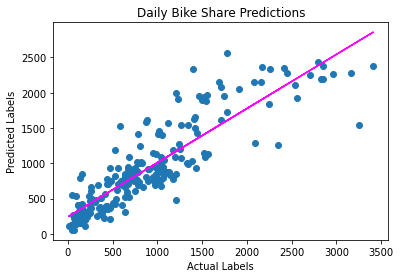

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Por si acaso, probemos también con un algoritmo de conjunto de refuerzo. Usaremos un estimador Gradient Boosting, que como un algoritmo Random Forest construye múltiples árboles, pero en lugar de construirlos todos de forma independiente y tomar el resultado promedio, cada árbol se construye sobre las salidas del anterior en un intento de reducir incrementalmente el pérdida (error) en el modelo.

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 104225.3407341225
RMSE: 322.83949686202044
R2: 0.7956727610527959


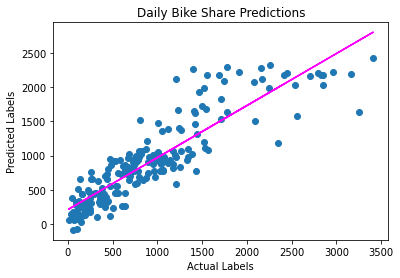

In [6]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Resumen**

Aquí hemos probado varios algoritmos de regresión nuevos para mejorar el rendimiento. En nuestro portátil veremos cómo 'ajustar' estos algoritmos para mejorar el rendimiento.